## Simulação de uma LLM com memória da conversa (versão mais moderna do framework)

ref.: 
* https://python.langchain.com/docs/how_to/message_history/
* https://www.langchain.com/langgraph

**todo**:
- Tentar gerenciar a memória da conversa de forma automatizada

In [1]:
from langchain_ollama import ChatOllama
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import START, MessagesState, StateGraph
from langchain_core.messages import RemoveMessage
from IPython.display import Image, display

## Utilização do llama3.2 com interface via ollama

In [2]:
llm = ChatOllama(model="llama3.2")
workflow = StateGraph(state_schema=MessagesState)

def call_model(state: MessagesState):
    response = llm.invoke(state["messages"])
    return {"messages": response}

workflow.add_edge(START, "model")
workflow.add_node("model", call_model)

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

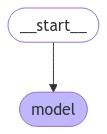

In [3]:
try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

## Pergunta para iniciar a conversa

In [4]:
config = {"configurable": {"thread_id": "abc123"}}

query = "Quem foi Albert Einstein?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.

Einstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.

Em 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do espaço-tempo e da natureza da gravidade.

Einstein também é conhecido por suas idei

In [5]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='fafb1f28-a594-44ce-a7ea-1fb66b133ffc'),
 AIMessage(content='Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.\n\nEinstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.\n\nEm 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do es

## O modelo consegue se lembrar do que acabou de responder

In [6]:
query = "O que você disse?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Eu disse que Albert Einstein foi um físico alemão nascido em 1879 e falecido em 1955, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico. Ele é considerado uma das maiores mentes da história, famoso por seus trabalhos em física teórica e experimentação.

Einstein desenvolveu a teoria especial da relatividade, que introduziu a ideia de que o tempo e o espaço são relativos, dependendo do observador. Ele também desenvolveu a teoria geral da relatividade, que unificou a gravitação com a teoria especial da relatividade.

Além disso, Einstein é conhecido por suas ideias políticas e filosóficas. Ele foi um pacifista e um defensor dos direitos civis, e seu trabalho em questões de justiça social e ética continua a inspirar gerações de cientistas e pensadores.

Algumas das contribuições notáveis de Einstein incluem:

*   A teoria da rel

In [7]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='fafb1f28-a594-44ce-a7ea-1fb66b133ffc'),
 AIMessage(content='Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.\n\nEinstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.\n\nEm 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do es

In [8]:
query = "O que você disse? Ainda não consegui entender"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Vou tentar explicar de outra forma.

Eu disse que Albert Einstein foi um físico alemão muito importante, nascido em 1879 e falecido em 1955. Ele é conhecido por suas ideias revolucionárias sobre o tempo, o espaço e a gravidade.

Einstein desenvolveu duas teorias principais:

1.  A teoria da relatividade especial (1905), que afirma que o tempo e o espaço podem variar dependendo do observador.
2.  A teoria geral da relatividade (1915), que unifica a gravitação com a teoria especial da relatividade.

Além disso, Einstein é conhecido por suas ideias políticas e filosóficas. Ele foi um pacifista e um defensor dos direitos civis, o que significa que ele acreditava que a violência não era a melhor maneira de resolver conflitos e que todos os seres humanos têm direito à liberdade e à igualdade.

Einstein recebeu muitas honrarias por suas contribuições para a ciência, incluindo o Prêmio Nobel de Física em 1921. El

In [9]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='fafb1f28-a594-44ce-a7ea-1fb66b133ffc'),
 AIMessage(content='Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.\n\nEinstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.\n\nEm 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do es

In [10]:
query = "Nasceu onde?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Albert Einstein nasceu em Ulm, Alemanha (atualmente parte da Alemanha), em 14 de março de 1879. Ele é considerado um dos cientistas mais importantes do século XX e seu legado continua a inspirar pessoas em todo o mundo.

Aqui estão algumas informações sobre sua infância:

*   **Localização:** Ulm, Alemanha
*   **Data de nascimento:** 14 de março de 1879
*   **Morte:** 18 de abril de 1955
*   **Profissão:** Físico teórico
*   **Contribuições científicas:** Teoria da relatividade especial e geral, equações da teoria quântica, etc.

Einstein cresceu em uma família judaica no sul da Alemanha. Ele foi um estudante destacado na escola e mais tarde se matriculou na Universidade de Munique para estudar física. Ele recebeu seu doutorado em 1905 e começou sua carreira como professor de física.

Quer saber mais sobre a infância de Einstein?


In [11]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='fafb1f28-a594-44ce-a7ea-1fb66b133ffc'),
 AIMessage(content='Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.\n\nEinstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.\n\nEm 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do es

In [12]:
query = "Quando?"
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================


In [13]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='fafb1f28-a594-44ce-a7ea-1fb66b133ffc'),
 AIMessage(content='Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.\n\nEinstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.\n\nEm 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do es

## Testando o isolamento de sessões

In [14]:
# trocando a sessão
config = {"configurable": {"thread_id": "def234"}}

query = "O que você disse por último?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Isso é a primeira vez que nós estamos conversando, então eu não disse nada ainda. Posso começar uma conversa com você se quiser!


In [15]:
output["messages"]

[HumanMessage(content='O que você disse por último?', additional_kwargs={}, response_metadata={}, id='763098ee-6452-40d4-af4a-f6e5767cdf19'),
 AIMessage(content='Isso é a primeira vez que nós estamos conversando, então eu não disse nada ainda. Posso começar uma conversa com você se quiser!', additional_kwargs={}, response_metadata={'model': 'llama3.2', 'created_at': '2024-10-05T20:04:49.217773452Z', 'message': {'role': 'assistant', 'content': ''}, 'done_reason': 'stop', 'done': True, 'total_duration': 591582091, 'load_duration': 63268676, 'prompt_eval_count': 32, 'prompt_eval_duration': 22655000, 'eval_count': 33, 'eval_duration': 503617000}, id='run-8f29a099-3626-42d7-a664-dde3bddfd094-0', usage_metadata={'input_tokens': 32, 'output_tokens': 33, 'total_tokens': 65})]

In [16]:
# retornando a sessão anterior
config = {"configurable": {"thread_id": "abc123"}}

query = "O que você disse por último?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

Eu disse que Albert Einstein nasceu em Ulm, Alemanha, em 14 de março de 1879. Ele é considerado um dos cientistas mais importantes do século XX e seu legado continua a inspirar pessoas em todo o mundo.

Aqui estão algumas informações sobre sua infância:

*   **Localização:** Ulm, Alemanha
*   **Data de nascimento:** 14 de março de 1879
*   **Morte:** 18 de abril de 1955

Einstein cresceu em uma família judaica no sul da Alemanha. Ele foi um estudante destacado na escola e mais tarde se matriculou na Universidade de Munique para estudar física. Ele recebeu seu doutorado em 1905 e começou sua carreira como professor de física.

Se quiser saber mais sobre a infância de Einstein, posso fornecer algumas informações adicionais:

*   **Família:** Einstein era o segundo filho de Hermann e Pauline Einstein.
*   **Infância:** Einstein passou sua infância em Ulm, onde seu pai trabalhava como engenheiro elétrico. Ele

In [17]:
output["messages"]

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='fafb1f28-a594-44ce-a7ea-1fb66b133ffc'),
 AIMessage(content='Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.\n\nEinstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.\n\nEm 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do es

## Removendo as 2 primeiras interações (para não entupir de tokens)

In [18]:
messages = app.get_state(config).values["messages"]
messages

[HumanMessage(content='Quem foi Albert Einstein?', additional_kwargs={}, response_metadata={}, id='fafb1f28-a594-44ce-a7ea-1fb66b133ffc'),
 AIMessage(content='Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.\n\nEinstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.\n\nEm 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do es

In [19]:
app.update_state(config, {"messages": RemoveMessage(id=messages[0].id)})
messages = app.get_state(config).values["messages"]
messages

[AIMessage(content='Albert Einstein foi um físico alemão nascido em 14 de março de 1879 e falecido em 18 de abril de 1955. Ele é considerado uma das maiores mentes da história, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico.\n\nEinstein é famoso por seus trabalhos em física teórica e experimentação. Em 1905, publicou quatro artigos que revolucionaram nossa compreensão da realidade: a teoria especial da relatividade (que introduz a ideia de que o tempo e o espaço são relativos), o efeito fotoelétrico (que explicava como a luz pode causar a emissão de elétrons) e as equações da teoria quântica.\n\nEm 1915, Einstein desenvolveu a teoria geral da relatividade, que unifica a gravitação com a teoria especial da relatividade. Esta teoria revolucionou nossa compreensão do espaço-tempo e da natureza da gravidade.\n\nEinstein também é conhecido por suas ideias políticas e filosóficas. Ele foi um pacifista e um de

In [20]:
app.update_state(config, {"messages": RemoveMessage(id=messages[0].id)})
messages = app.get_state(config).values["messages"]
messages

[HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='e98faed6-963c-4a27-9cac-cb27faadd3f7'),
 AIMessage(content='Eu disse que Albert Einstein foi um físico alemão nascido em 1879 e falecido em 1955, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico. Ele é considerado uma das maiores mentes da história, famoso por seus trabalhos em física teórica e experimentação.\n\nEinstein desenvolveu a teoria especial da relatividade, que introduziu a ideia de que o tempo e o espaço são relativos, dependendo do observador. Ele também desenvolveu a teoria geral da relatividade, que unificou a gravitação com a teoria especial da relatividade.\n\nAlém disso, Einstein é conhecido por suas ideias políticas e filosóficas. Ele foi um pacifista e um defensor dos direitos civis, e seu trabalho em questões de justiça social e ética continua a inspirar gerações de cientistas e pensadores.\n\nA

## Retomando a conversa (para verificar se continua coerente)

In [21]:
query = "Qual foi a maior contribuição dele?"
input_messages = [HumanMessage(query)]
output = app.invoke({"messages": input_messages}, config)
output["messages"][-1].pretty_print()

================================== Ai Message ==================================

A maior contribuição de Albert Einstein é considerada ser a teoria da relatividade, que ele desenvolveu em duas partes: a teoria da relatividade especial e a teoria geral da relatividade.

*   **Teoria da Relatividade Especial:** A teoria da relatividade especial, introduzida por Einstein em 1905, afirma que o tempo e o espaço são relativos, dependendo do observador. Isso significa que a velocidade da luz é constante e independente de onde estamos, e que o tempo pode passar mais ou menos rapidamente dependendo da velocidade com que somos movidos.
*   **Teoria Geral da Relatividade:** A teoria geral da relatividade, introduzida por Einstein em 1915, é uma extensão da teoria da relatividade especial. Ela afirma que a gravitação não é uma força, como era comumente entendida na época, mas sim uma curvatura do espaço e do tempo causada pela presença de massa e energia.

Essas contribuições de Einstein revoluci

In [22]:
output["messages"]

[HumanMessage(content='O que você disse?', additional_kwargs={}, response_metadata={}, id='e98faed6-963c-4a27-9cac-cb27faadd3f7'),
 AIMessage(content='Eu disse que Albert Einstein foi um físico alemão nascido em 1879 e falecido em 1955, conhecido por suas contribuições fundamentais para a teoria da relatividade e pela interpretação mais ampla do efeito fotoelétrico. Ele é considerado uma das maiores mentes da história, famoso por seus trabalhos em física teórica e experimentação.\n\nEinstein desenvolveu a teoria especial da relatividade, que introduziu a ideia de que o tempo e o espaço são relativos, dependendo do observador. Ele também desenvolveu a teoria geral da relatividade, que unificou a gravitação com a teoria especial da relatividade.\n\nAlém disso, Einstein é conhecido por suas ideias políticas e filosóficas. Ele foi um pacifista e um defensor dos direitos civis, e seu trabalho em questões de justiça social e ética continua a inspirar gerações de cientistas e pensadores.\n\nA